In [ ]:
# executar celula abaixo somente se a lib não está instalada no notebook atual ou na sua máquina

In [1]:
!pip install matplotlib

     |████████████████████████████████| 11.6 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 42.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 61.3 MB/s eta 0:00:01


In [3]:
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
def elementForSort(elem):
    return elem[3]

def cases(elem):
    
    result = []
    
    for item  in elem:
        result.append(item[0])
        
    return result

def temp(elem):
    
    result = []

    for item  in elem:
        result.append(item[2])

    return result

In [45]:
# Load content
contentURL = "https://raw.githubusercontent.com/MatheusBulhoes/MC536-Trabalho/main/final/content.csv"

df = pd.read_csv(contentURL)


#Organize content
dataPerCountry = {}
for row in df.itertuples():
    
    cases = row[3]
    deaths = row[4]
    temp = row[5]
    
    day = row[6]
    dayString = day[:4] + "-" + day[4:6] + "-" + day[6:8] 

    dayObj = date.fromisoformat(dayString)

    if row[2] in dataPerCountry:
        dataPerCountry[row[2]].append((cases, deaths, temp, dayObj))

    else:
        dataPerCountry[row[2]] = [(cases, deaths, temp, dayObj)]
        
# Sort content by day     
for countryDataKey in dataPerCountry:
    dataPerCountry[countryDataKey].sort(key=elementForSort)
    for item in dataPerCountry[countryDataKey]:
        print(str(item[3].day) + "-" + str(item[3].month) + "-" + str(item[3].year))
    print("Acabou pais")
    

9-3-2020
10-3-2020
11-3-2020
12-3-2020
13-3-2020
14-3-2020
15-3-2020
16-3-2020
17-3-2020
18-3-2020
19-3-2020
9-5-2020
10-5-2020
11-5-2020
12-5-2020
13-5-2020
14-5-2020
15-5-2020
16-5-2020
17-5-2020
18-5-2020
19-5-2020
9-7-2020
10-7-2020
11-7-2020
12-7-2020
13-7-2020
14-7-2020
15-7-2020
16-7-2020
17-7-2020
18-7-2020
19-7-2020
9-9-2020
10-9-2020
11-9-2020
12-9-2020
13-9-2020
14-9-2020
15-9-2020
16-9-2020
17-9-2020
18-9-2020
19-9-2020
9-11-2020
10-11-2020
11-11-2020
12-11-2020
13-11-2020
14-11-2020
15-11-2020
16-11-2020
17-11-2020
18-11-2020
19-11-2020
Acabou pais
9-3-2020
10-3-2020
11-3-2020
12-3-2020
13-3-2020
14-3-2020
15-3-2020
16-3-2020
17-3-2020
18-3-2020
19-3-2020
9-5-2020
10-5-2020
11-5-2020
12-5-2020
13-5-2020
14-5-2020
15-5-2020
16-5-2020
17-5-2020
18-5-2020
19-5-2020
9-7-2020
10-7-2020
11-7-2020
12-7-2020
13-7-2020
14-7-2020
15-7-2020
16-7-2020
17-7-2020
18-7-2020
19-7-2020
9-9-2020
10-9-2020
11-9-2020
12-9-2020
13-9-2020
14-9-2020
15-9-2020
16-9-2020
17-9-2020
18-9-2020
19-9-2

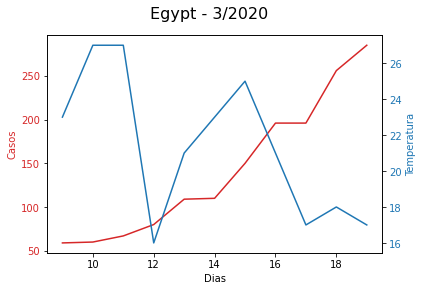

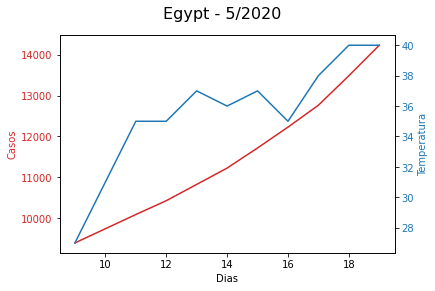

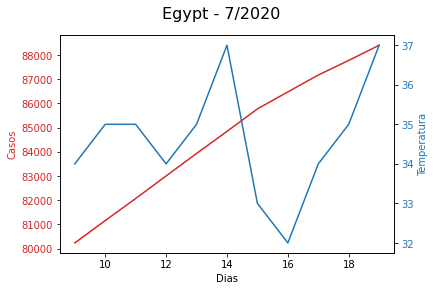

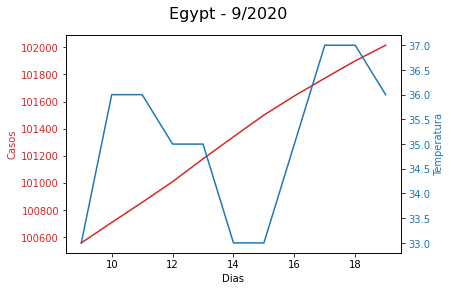

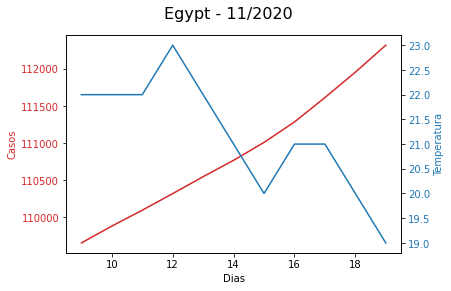

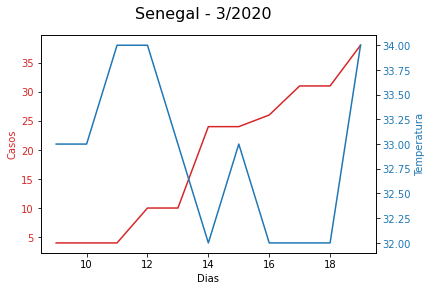

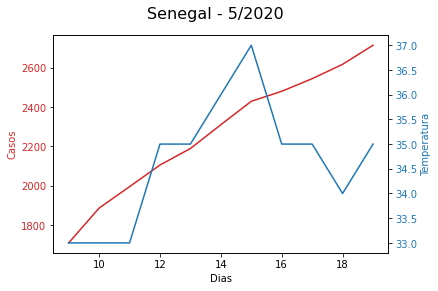

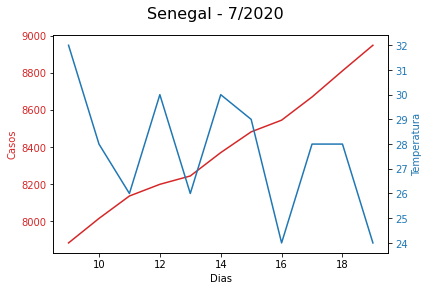

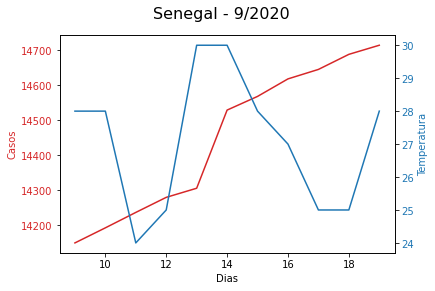

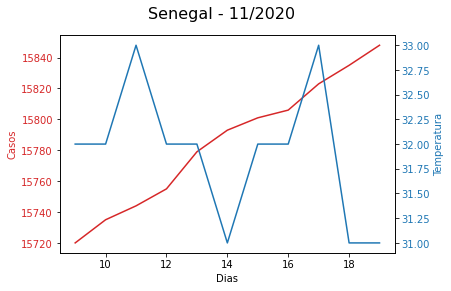

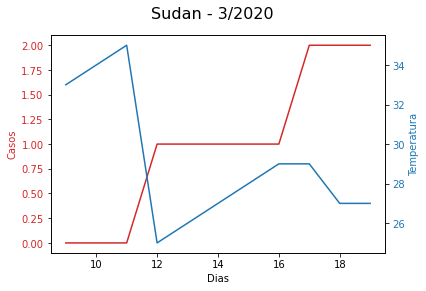

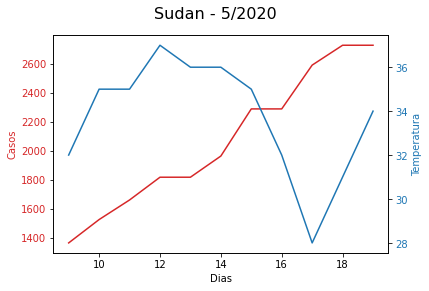

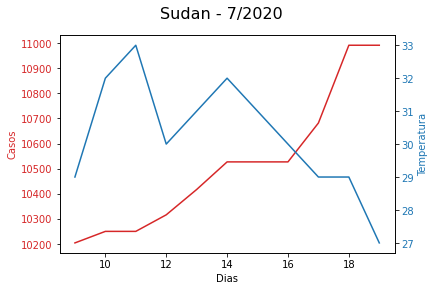

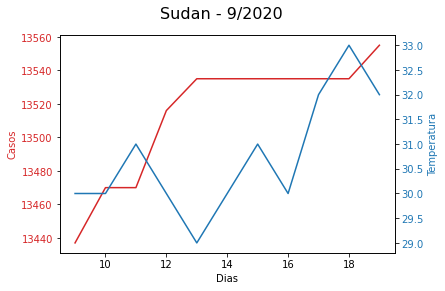

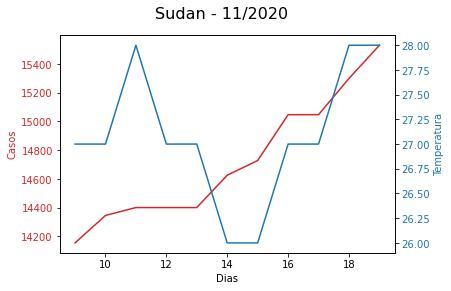

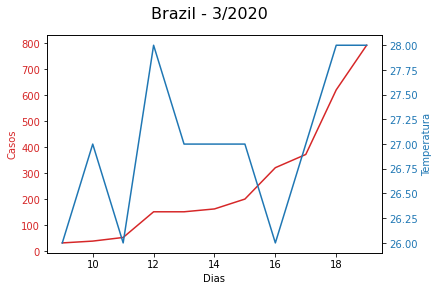

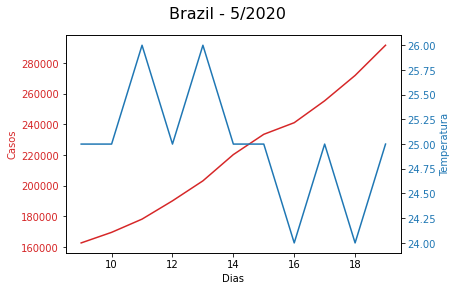

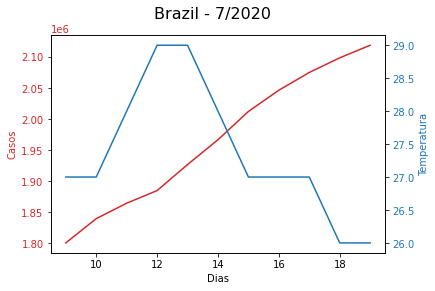

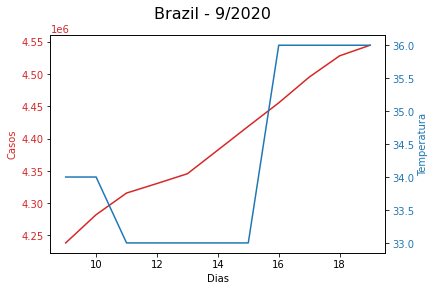

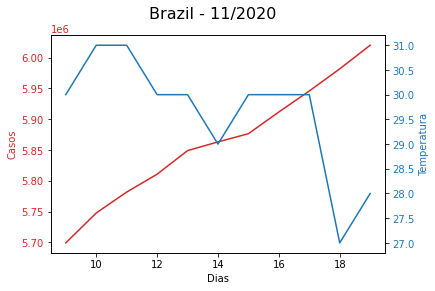

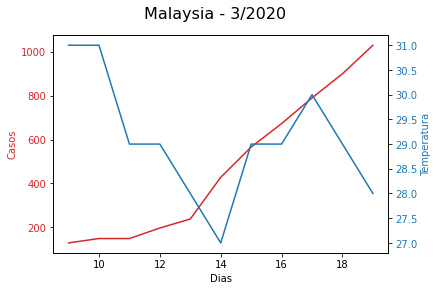

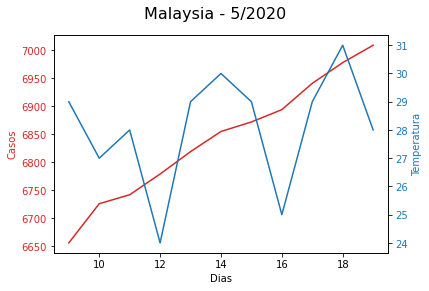

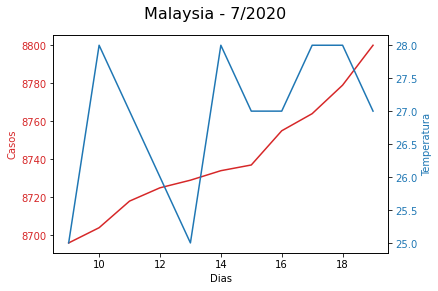

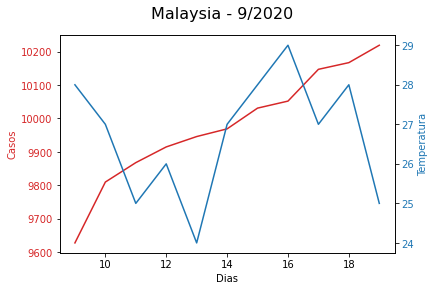

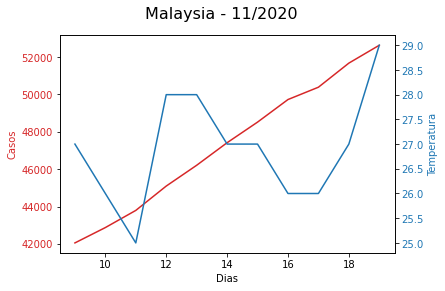

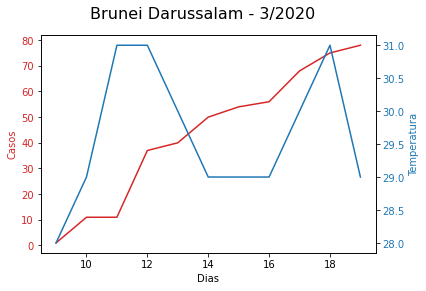

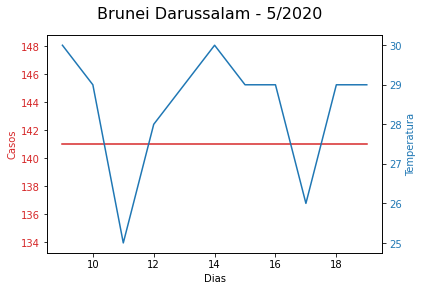

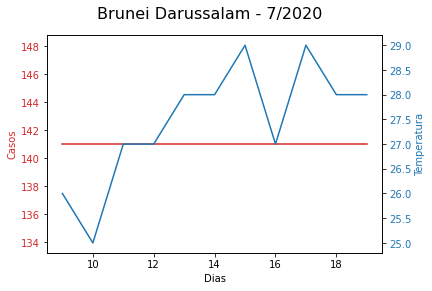

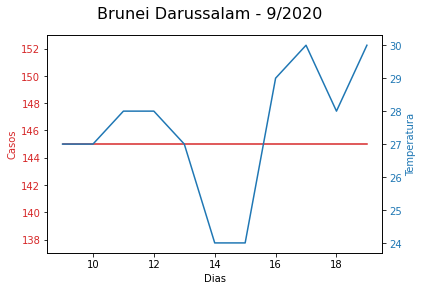

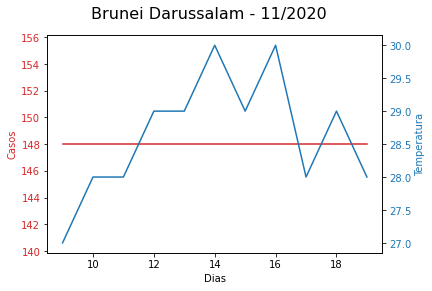

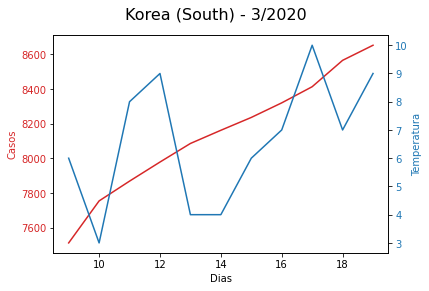

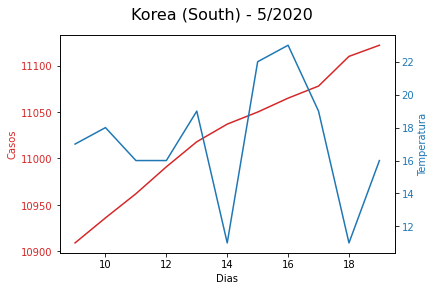

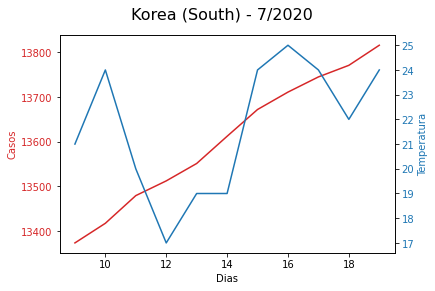

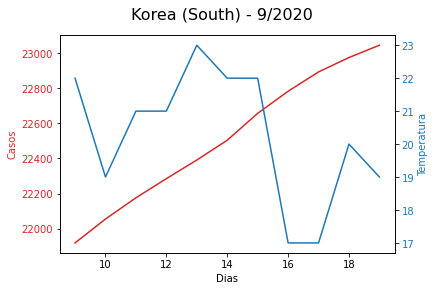

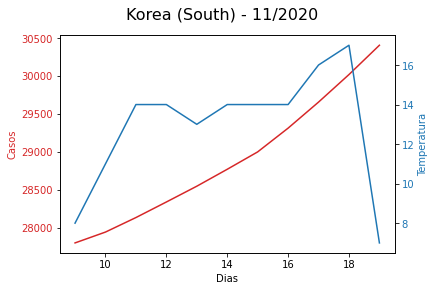

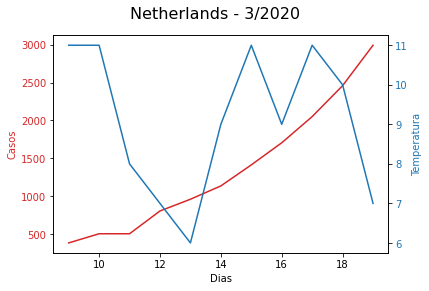

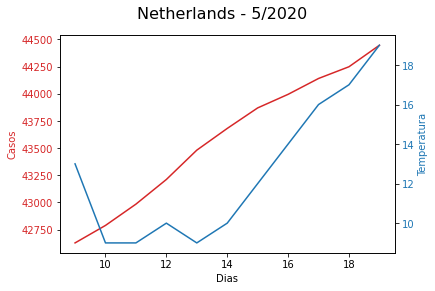

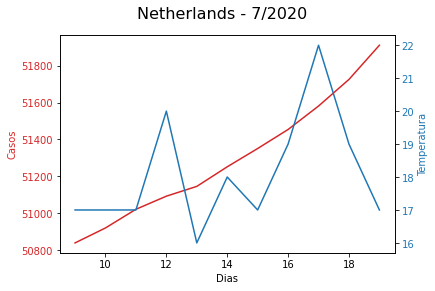

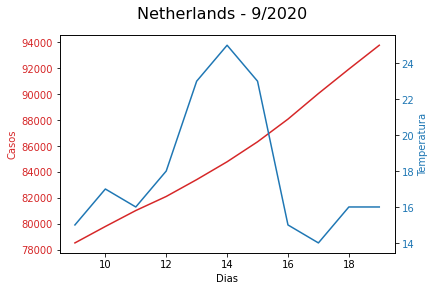

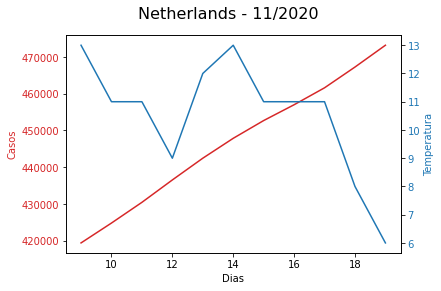

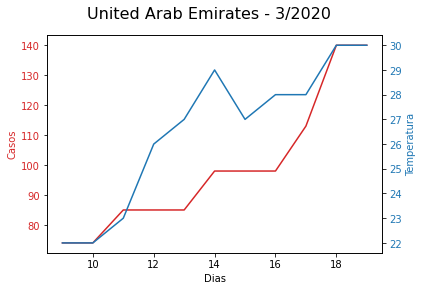

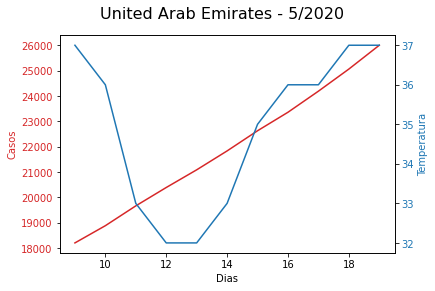

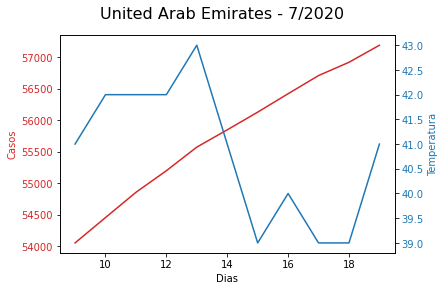

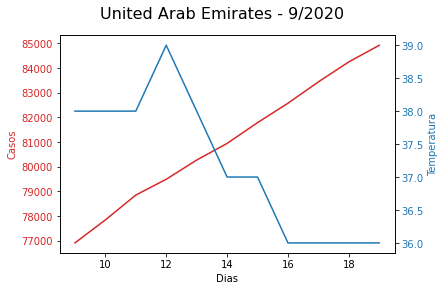

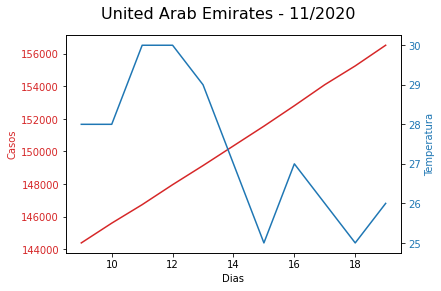

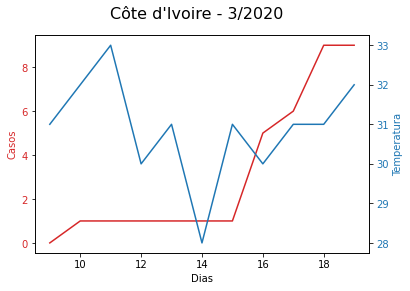

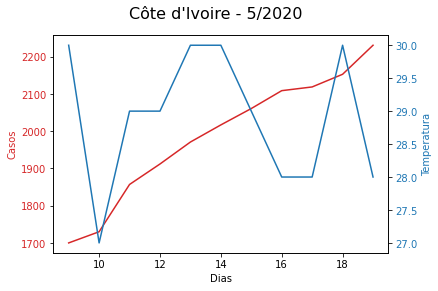

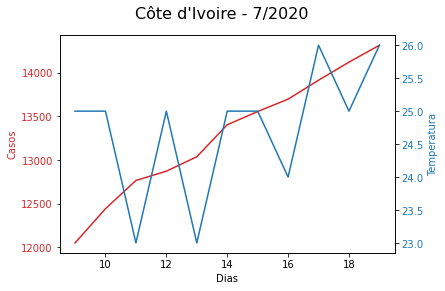

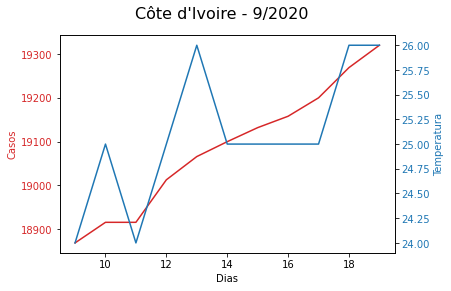

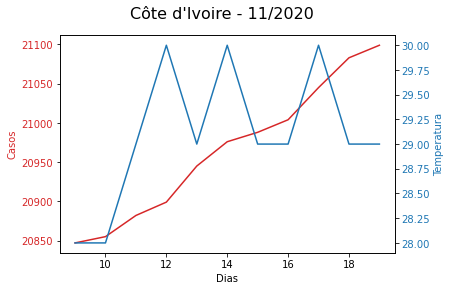

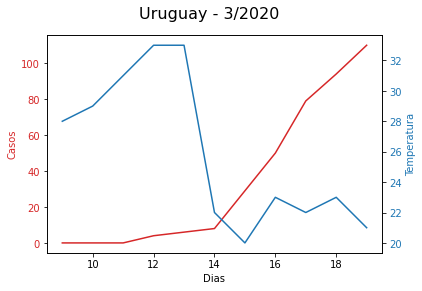

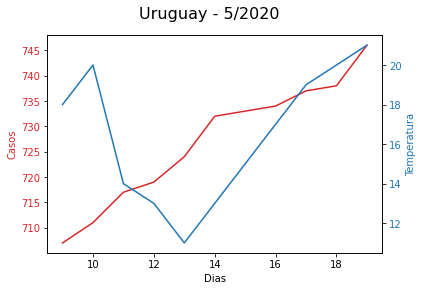

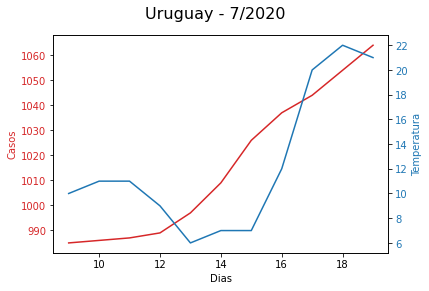

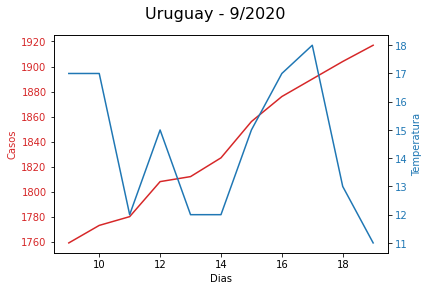

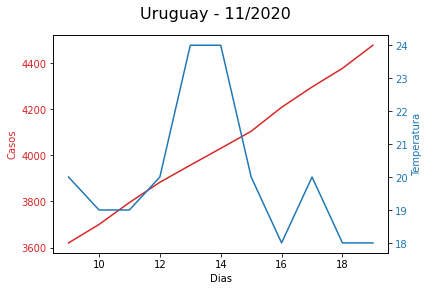

In [52]:
# Plot content

for countryDataKey in dataPerCountry:
    
    data =  dataPerCountry[countryDataKey]
    dayX = []
    casesY = []
    tempY = []
    
    i = 0
    
    for item in data:
        
        # cria os eixos
        dayX.append(item[3].day)
        casesY.append(item[0])
        tempY.append(item[2])
        
        i+=1
        
        # pegamos periodos de 11 dias, como o vetor está ordenado podemos plotar a cada 11 interações
        if i == 11:
    
            # curva dos casos
            fig, ax1 = plt.subplots()

            color = 'tab:red'
            ax1.set_xlabel('Dias')
            ax1.set_ylabel('Casos', color=color)
            ax1.plot(dayX, casesY, color=color)
            ax1.tick_params(axis='y', labelcolor=color)

            # curva da temperatura
            ax2 = ax1.twinx()  

            color = 'tab:blue'
            ax2.set_ylabel('Temperatura', color=color) 
            ax2.plot(dayX, tempY, color=color)
            ax2.tick_params(axis='y', labelcolor=color)
 
            fig.suptitle(countryDataKey + " - " + str(item[3].month) + "/" + str(item[3].year), fontsize=16)
            plt.show()
            
            # recomeça os valores
            dayX = []
            casesY = []
            tempY = []
            i = 0

    